In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
#import xgboost as xgb

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '%.1f' % x)
color = sns.color_palette()
np.random.seed(0)

In [352]:
df_sales = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
logerror           90275 non-null float64
transactiondate    90275 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


Data is error = log(ZEstimate/Sale Price). So exp(error) - 1 is the % misprice

In [353]:
df_sales['error'] = df_sales.logerror.map(lambda x: math.exp(x) - 1)
df_sales.describe(include="all")

,parcelid,logerror,transactiondate,error
count,9.027500e+04,90275.000000,90275,90275.000000
unique,NaN,NaN,352,NaN
top,NaN,NaN,2016-07-29 00:00:00,NaN
freq,NaN,NaN,910,NaN
first,NaN,NaN,2016-01-01 00:00:00,NaN
last,NaN,NaN,2016-12-30 00:00:00,NaN
mean,1.298466e+07,0.011457,NaN,0.032591
std,2.504510e+06,0.161079,NaN,0.711017
min,1.071174e+07,-4.605000,NaN,-0.989998
25%,1.155950e+07,-0.025300,NaN,-0.024983


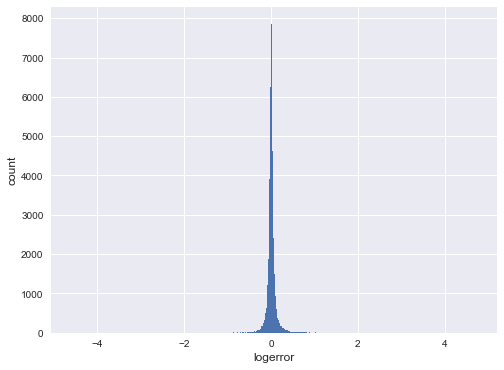

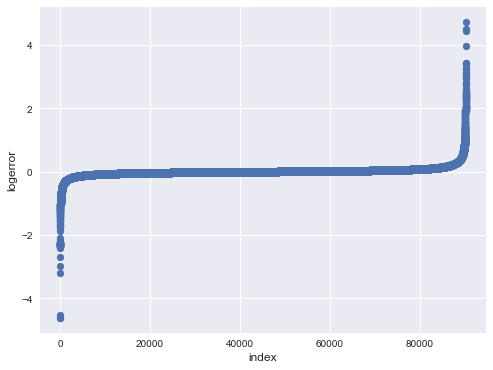

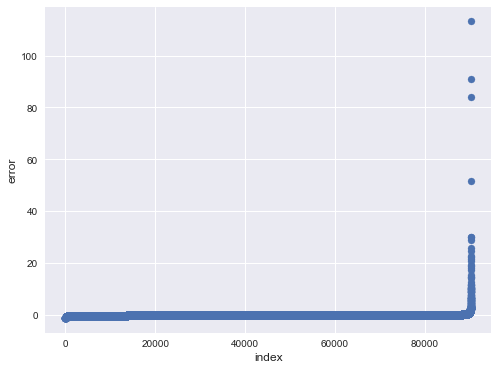

In [354]:
plt.figure(figsize=(8,6))
plt.hist(df_sales.logerror, bins=1000)
plt.xlabel('logerror', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(range(df_sales.shape[0]), np.sort(df_sales.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(range(df_sales.shape[0]), np.sort(df_sales.error.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('error', fontsize=12)
plt.show()

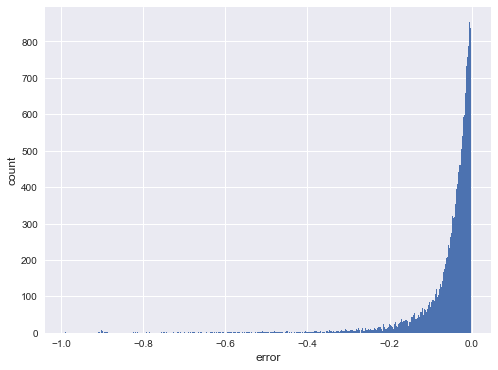

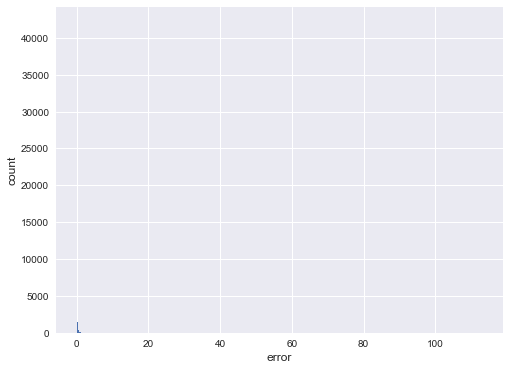

In [355]:
plt.figure(figsize=(8,6))
plt.hist(df_sales[df_sales.error < 0].error, bins=1000)
plt.xlabel('error', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(df_sales[df_sales.error > 0].error, bins=1000)
plt.xlabel('error', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

In [356]:
underpricings = len(df_sales[df_sales.error < 0].error)
overpricings = len(df_sales[df_sales.error > 0].error)

print(str(underpricings) + ' underpricings')
print(str(overpricings) + ' overpricings')

print(str(100 * underpricings / (underpricings + overpricings)) + '% underpriced')

39667 underpricings
49761 overpricings
44.35635371472022% underpriced


We are interested in cases where error < 0 (i.e. ZEstimate was lower than Sale Price). Seems like there is a reasonable tail.

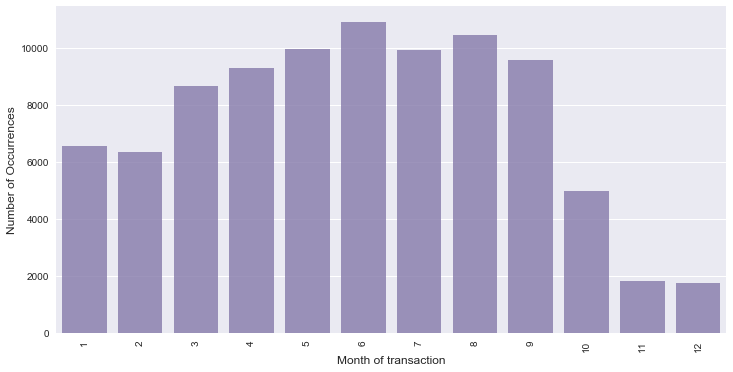

In [357]:
df_sales['transactionmonth'] = df_sales.transactiondate.dt.month
count = df_sales['transactionmonth'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index, count.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

The train data has all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016.
So we have shorter bars in the last three months.

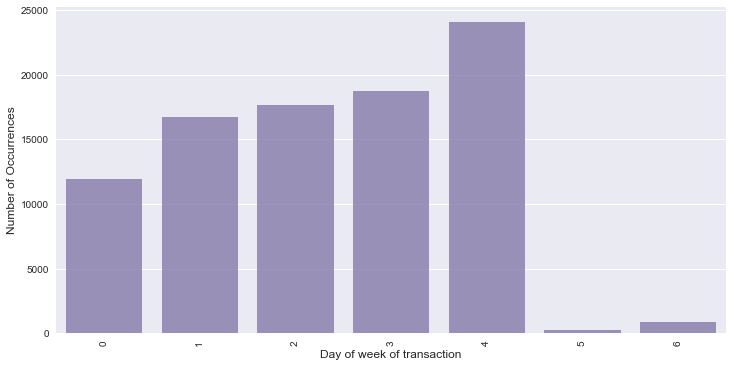

In [358]:
df_sales['transactiondayofweek'] = df_sales.transactiondate.dt.weekday
count = df_sales['transactiondayofweek'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index, count.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Day of week of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

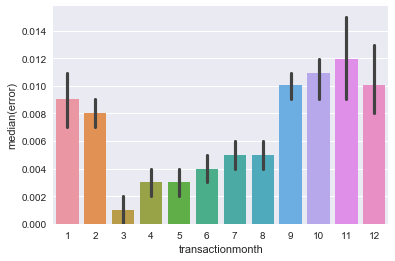

In [359]:
ax1 = sns.barplot(x="transactionmonth", y="error", data=df_sales, estimator=np.median)

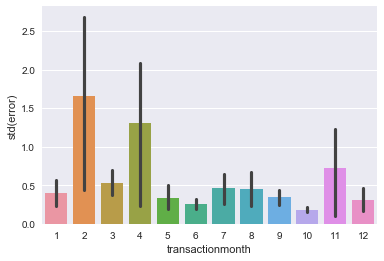

In [360]:
ax2 = sns.barplot(x="transactionmonth", y="error", data=df_sales, estimator=np.std)

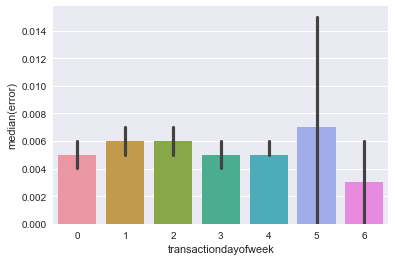

In [361]:
ax1 = sns.barplot(x="transactiondayofweek", y="error", data=df_sales, estimator=np.median)

In [362]:
(df_sales['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

Most of the parcelids appear once

In [366]:
df_houses = pd.read_csv("properties_2016.csv")
df_houses.info()

C:\Users\gorokf\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [455]:
df_houses.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
parcelid,2985217.0,NaN,NaN,NaN,13325858.4,7909966.4,10711725.0,11643707.0,12545094.0,14097122.0,169601949.0
airconditioningtypeid,811519.0,NaN,NaN,NaN,1.9,3.1,1.0,1.0,1.0,1.0,13.0
architecturalstyletypeid,6061.0,NaN,NaN,NaN,7.2,2.4,2.0,7.0,7.0,7.0,27.0
basementsqft,1628.0,NaN,NaN,NaN,646.9,538.8,20.0,272.0,534.0,847.2,8516.0
bathroomcnt,2973755.0,NaN,NaN,NaN,2.2,1.1,0.0,2.0,2.0,3.0,20.0
bedroomcnt,2973767.0,NaN,NaN,NaN,3.1,1.3,0.0,2.0,3.0,4.0,20.0
buildingclasstypeid,12629.0,NaN,NaN,NaN,3.7,0.5,1.0,3.0,4.0,4.0,5.0
buildingqualitytypeid,1938488.0,NaN,NaN,NaN,5.8,1.8,1.0,4.0,7.0,7.0,12.0
calculatedbathnbr,2856305.0,NaN,NaN,NaN,2.3,1.0,1.0,2.0,2.0,3.0,20.0
decktypeid,17096.0,NaN,NaN,NaN,66.0,0.0,66.0,66.0,66.0,66.0,66.0


In [369]:
df = pd.merge(df_houses, df_sales, on='parcelid', how='left')
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,error,transactionmonth,transactiondayofweek
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


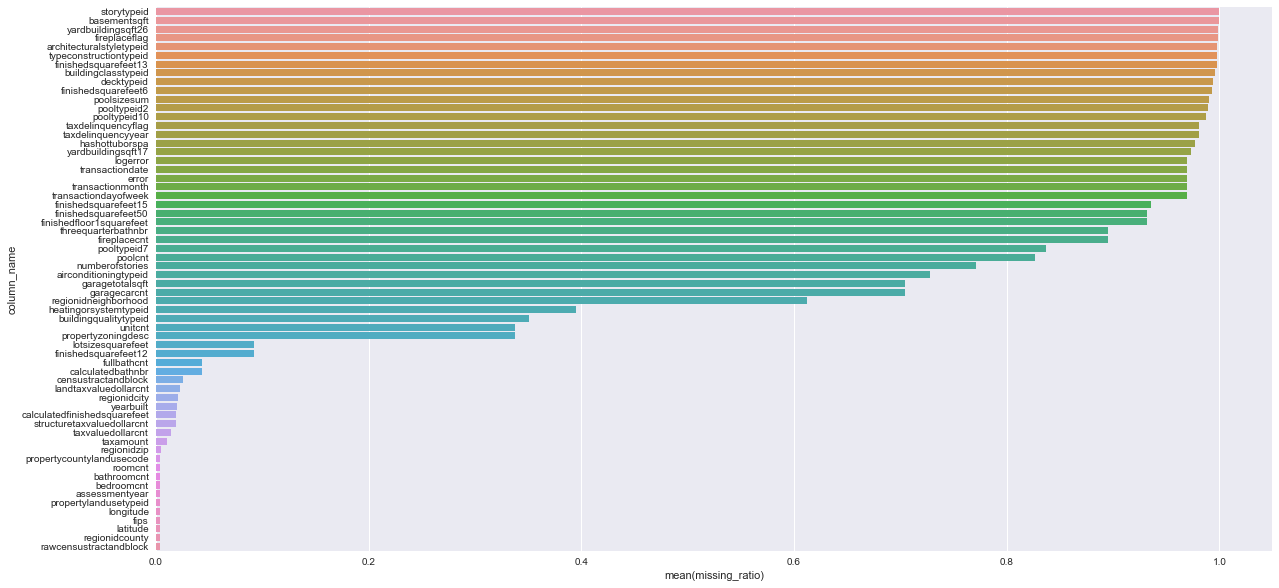

In [370]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df.shape[0]
missing_df.sort_values('missing_ratio', ascending=False, inplace=True)
missing_df = missing_df[missing_df['missing_ratio']>0.0]

plt.figure(figsize=(20,10))
ax1 = sns.barplot(x="missing_ratio", y="column_name", data=missing_df, estimator=np.mean, orient='h')

Lots of missing values!

In [381]:
#plt.figure(figsize=(20,20))
#colors = plt.get_cmap('coolwarm')
#g = sns.jointplot(x=df.latitude.values, y=df.longitude.values, size=10, joint_kws={"color":colors(df.logerror.values)})
#plt.ylabel('Longitude', fontsize=12)
#plt.xlabel('Latitude', fontsize=12)
#plt.show()

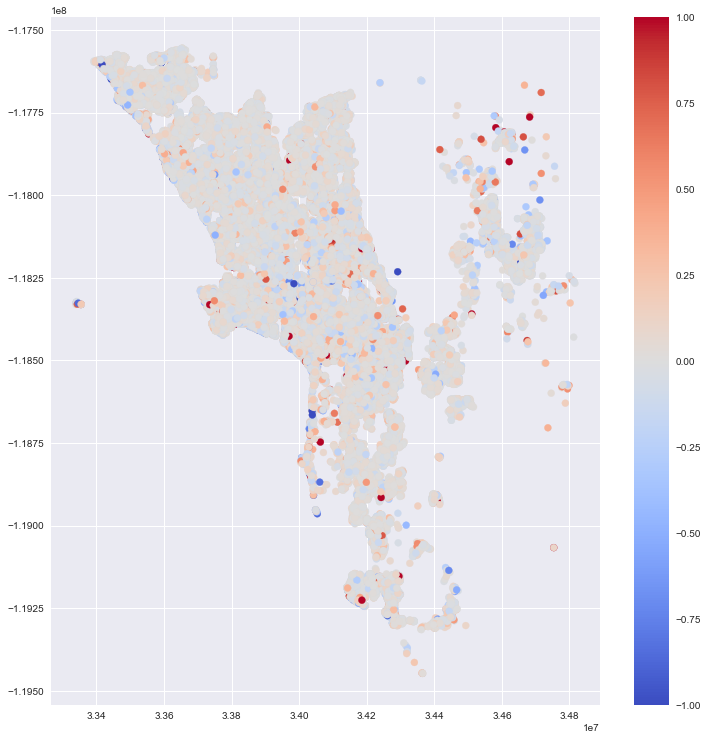

In [438]:
fig = plt.figure(figsize=(20,20))

latitude_min = 3.39*1e7
latitude_max = 3.41*1e7

longitude_min = -1.1830*1e8
longitude_max = -1.1825*1e8

df_zoom = df
#df_zoom = df[(df.latitude > latitude_min) & (df.latitude < latitude_max) & (df.longitude < longitude_max) & (df.longitude > longitude_min)]
ulimit = 1
llimit = -1
df_zoom['logerror'].loc[df_zoom['logerror']>ulimit] = ulimit
df_zoom['logerror'].loc[df_zoom['logerror']<llimit] = llimit

x = df_zoom.latitude.values
y = df_zoom.longitude.values
c = df_zoom.logerror.values

ax1 = fig.add_subplot(221)
cb1 = ax1.scatter(x, y, c=c, cmap=plt.cm.get_cmap('coolwarm'))
plt.colorbar(cb1, ax=ax1)
plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=1.0)

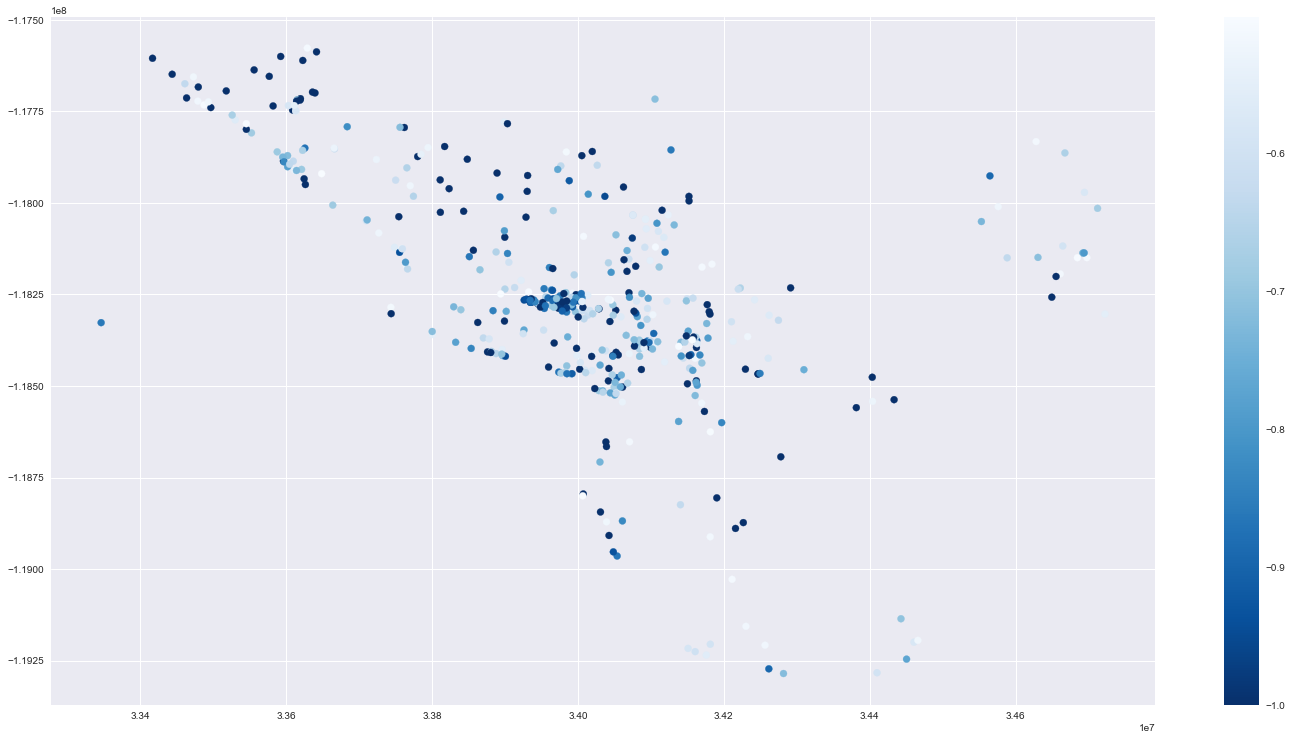

In [451]:
fig = plt.figure(figsize=(20, 20))

treshold_down = -0.5
treshold_up = 990.5

x = df_zoom[(df_zoom.logerror < treshold_down) | (df_zoom.logerror > treshold_up)].latitude.values
y = df_zoom[(df_zoom.logerror < treshold_down) | (df_zoom.logerror > treshold_up)].longitude.values
c = df_zoom[(df_zoom.logerror < treshold_down) | (df_zoom.logerror > treshold_up)].logerror.values

ax1 = fig.add_subplot(211)
cb1 = ax1.scatter(x, y, c=c, cmap=plt.cm.get_cmap('Blues_r'))
plt.colorbar(cb1, ax=ax1)
plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=1.0)

Looks like there are some clusters (cities?) of underpricing

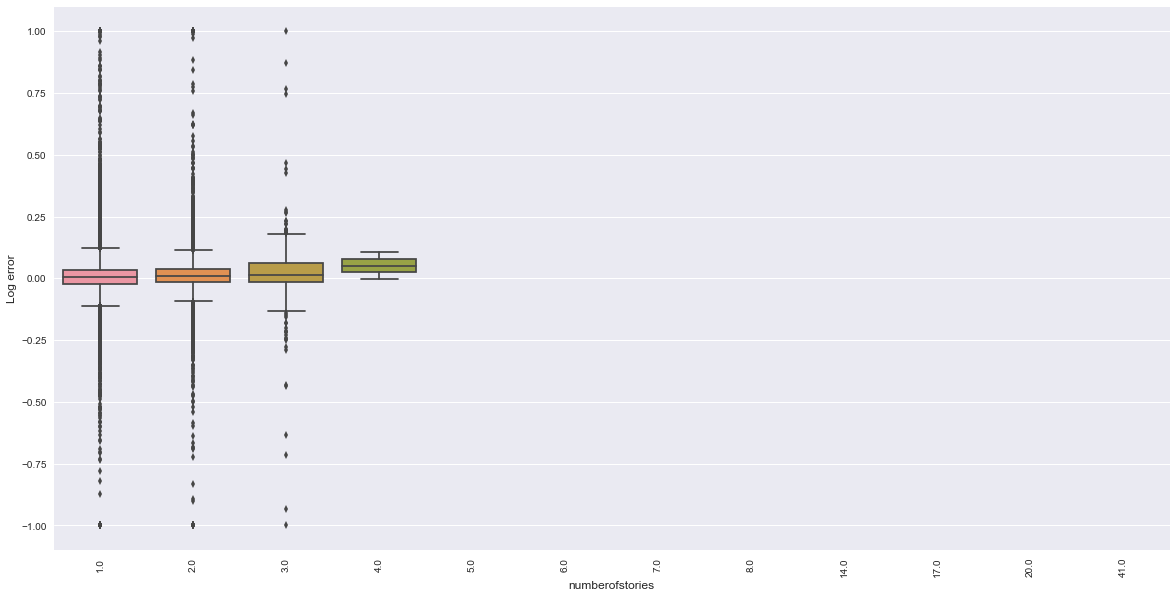

In [466]:
plt.figure(figsize=(20, 10))
col = 'numberofstories'
sns.boxplot(x=col, y="logerror", data=df)
plt.ylabel('Log error', fontsize=12)
plt.xlabel(col, fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [411]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df.shape[0]
missing_df.sort_values('missing_ratio', ascending=False, inplace=True)
columns1 = missing_df[missing_df['missing_ratio']<0.5].column_name.values
columns1 = np.append(columns1, 'logerror')

df_types = df.dtypes.reset_index()
df_types.columns = ["columnname", "columntype"]
columns2 = df_types[df_types.columntype == 'float64'].columnname.values

df2 = df[[value for value in columns1 if value in columns2]]

mean_values = df2.mean(axis=0)
df2.fillna(mean_values, inplace=True)
df2 = df2.loc[:10000]

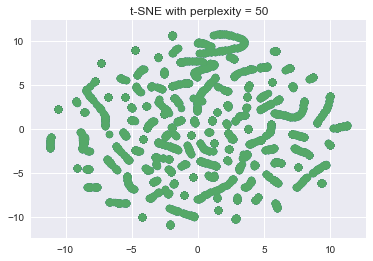

In [392]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, n_iter = 200, random_state=0, perplexity = i)
Y = model.fit_transform(df2)
plt.subplot(int(str(11)+str(1)))
plt.scatter(Y[:, 0], Y[:, 1])
plt.scatter(Y[:, 0], Y[:, 1])
plt.title('t-SNE with perplexity = {}'.format(i))

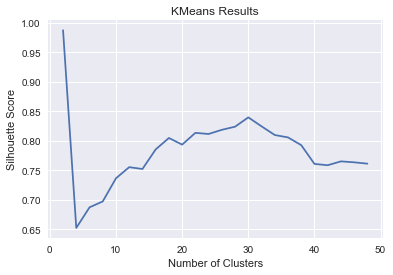

In [393]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

kmin = 2
kmax = 50
scores = []

#Compute silouhette scoeres
for k in range(kmin,kmax,2):
    km = KMeans(n_clusters=k, n_init=20).fit(df2)
    scores.append(silhouette_score(df2, km.labels_))

#Plot
plt.plot(range(kmin,kmax,2), scores)
plt.title('KMeans Results')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [401]:
import collections

km = KMeans(n_clusters=30, n_init=20).fit(df2)
colors=km.labels_
counter=collections.Counter(colors)
print(counter)

Counter({1: 950, 5: 726, 13: 510, 18: 487, 20: 438, 6: 425, 12: 423, 17: 418, 3: 366, 25: 365, 19: 358, 7: 343, 14: 329, 29: 316, 23: 307, 21: 301, 2: 297, 10: 292, 8: 256, 27: 245, 28: 229, 9: 224, 22: 224, 4: 220, 0: 201, 26: 191, 16: 179, 11: 132, 24: 128, 15: 121})


In [413]:
df2['cluster'] = colors

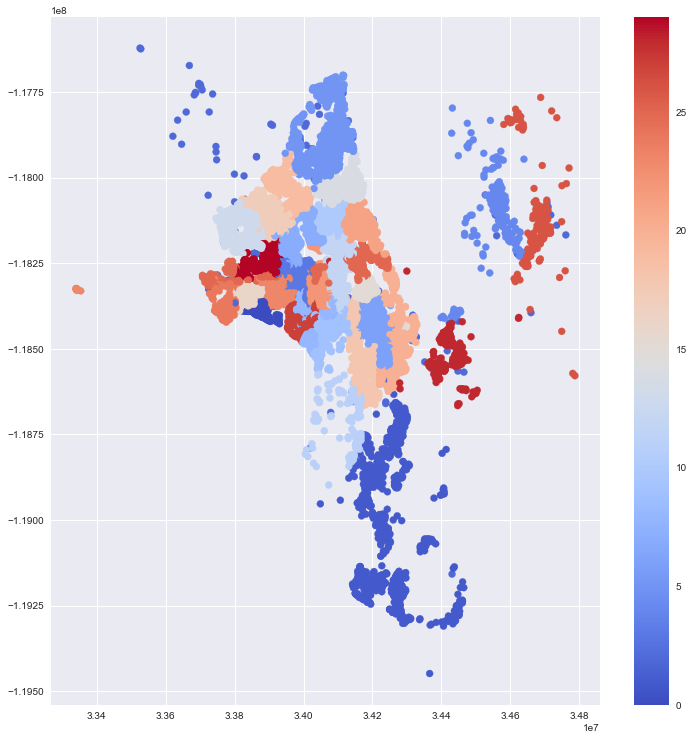

In [421]:
fig = plt.figure(figsize=(20,20))

x = df2.latitude.values
y = df2.longitude.values
c = df2.cluster.values

ax1 = fig.add_subplot(221)
cb1 = ax1.scatter(x, y, c=c, cmap=plt.cm.get_cmap('coolwarm'))
plt.colorbar(cb1, ax=ax1)
plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=1.0)

In [523]:
t = pd.read_table('https://download.bls.gov/pub/time.series/sm/sm.data.31.NewJersey')

In [524]:
t.info()
t.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197832 entries, 0 to 197831
Data columns (total 5 columns):
series_id         197832 non-null object
year              197832 non-null int64
period            197832 non-null object
value             197832 non-null float64
footnote_codes    197832 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 7.5+ MB


,series_id,year,period,value,footnote_codes
0,SMS34000000000000001,1990,M01,3691.4,
1,SMS34000000000000001,1990,M02,3691.5,
2,SMS34000000000000001,1990,M03,3694.5,
3,SMS34000000000000001,1990,M04,3667.6,
4,SMS34000000000000001,1990,M05,3659.6,


In [550]:
d = t.copy()

d.series_id = d.series_id.astype('str')
d.period = d.period.astype('str')

d = d[d.period != 'M13']
d = d[d.series_id.isin(['SMS34000000000000001          '])]

In [558]:
import datetime

d['datetime'] = d.apply(lambda x: datetime.date(year=x['year'], month=int(x['period'].replace('M', '')), day=25), axis=1)

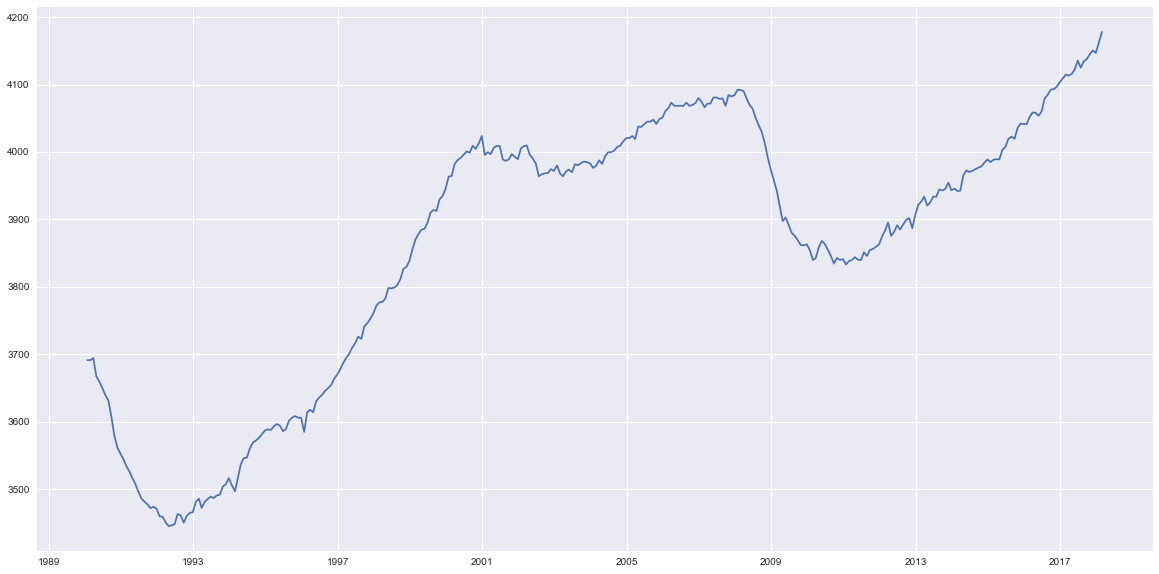

In [561]:
fig = plt.figure(figsize=(20,10))
plt.plot(d.datetime, d.value)